In [3]:
# @title Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

ModuleNotFoundError: No module named 'google.colab'

In [9]:
# @title Import required libraries

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Part 1: Load and Evaluate The Data Set

In [10]:
'''
Here we will load the dataset using pandas:
'''
import pandas as pd
import numpy as np
dataset = pd.read_csv('heart.csv')
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [11]:
# Print the shape of dataset. Hint: use 'shape' command
print(dataset.shape)

(918, 12)


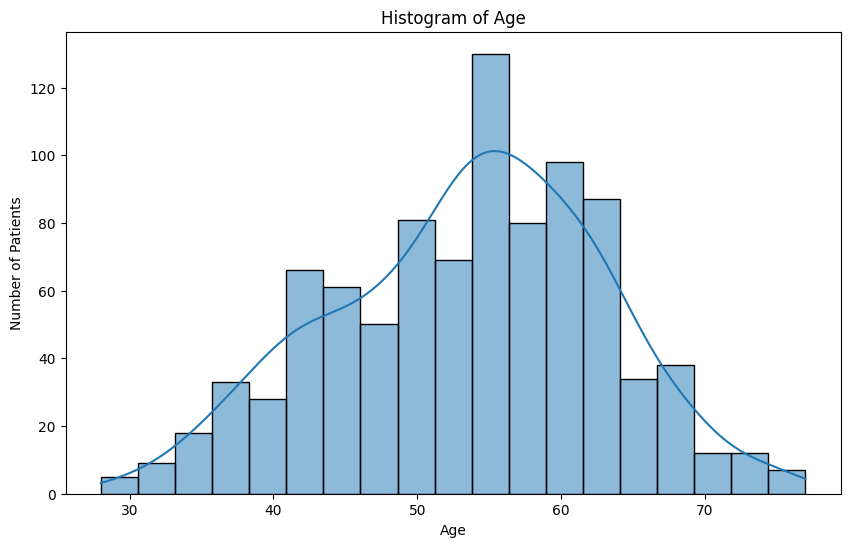

In [13]:
# Here we plot the histogram of feature 'Age' versus the number of patient
# Just run this cell to see the output
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram using Seaborn
sns.histplot(dataset['Age'], kde=True)

# Add title and labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')

# Show the plot
plt.show()

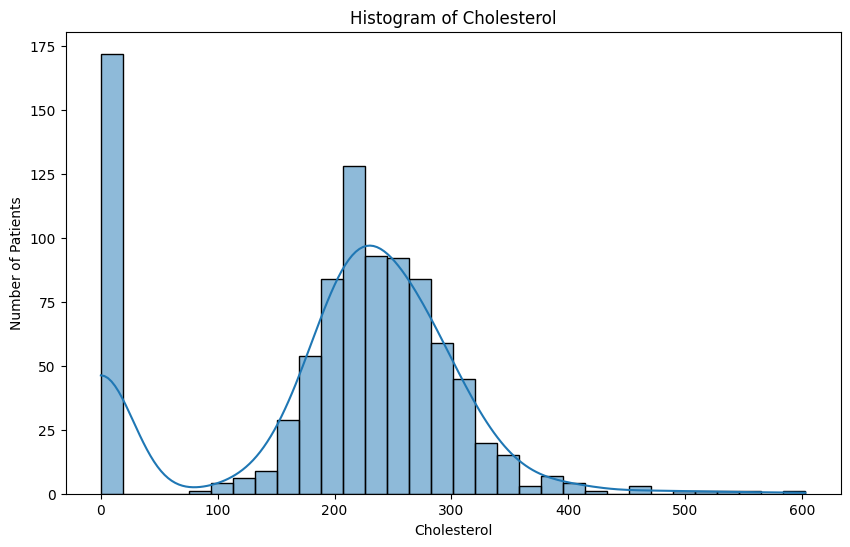

In [14]:
'''
Follow steps in the previous cell to plot the histogram of feature
'Cholesterol' versus the number of patient
'''

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram using Seaborn
sns.histplot(dataset['Cholesterol'], kde=True)

# Add title and labels
plt.title('Histogram of Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Number of Patients')

# Show the plot
plt.show()

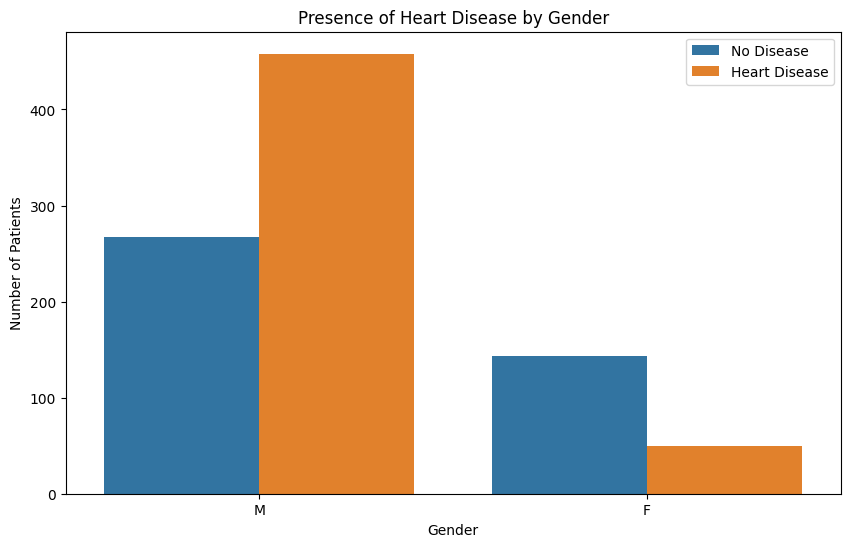

In [16]:
'''
In this cell, we count the number of males and females
with/without Heart Desease
'''

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a countplot using Seaborn
# Hint: use 'countplot' command; x and hue will be 'Sex' and 'HeartDisease', respectively.
sns.countplot(data=dataset, x='Sex', hue='HeartDisease')

# Add title and labels
plt.title('Presence of Heart Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.legend(['No Disease', 'Heart Disease'])

# Show the plot
plt.show()

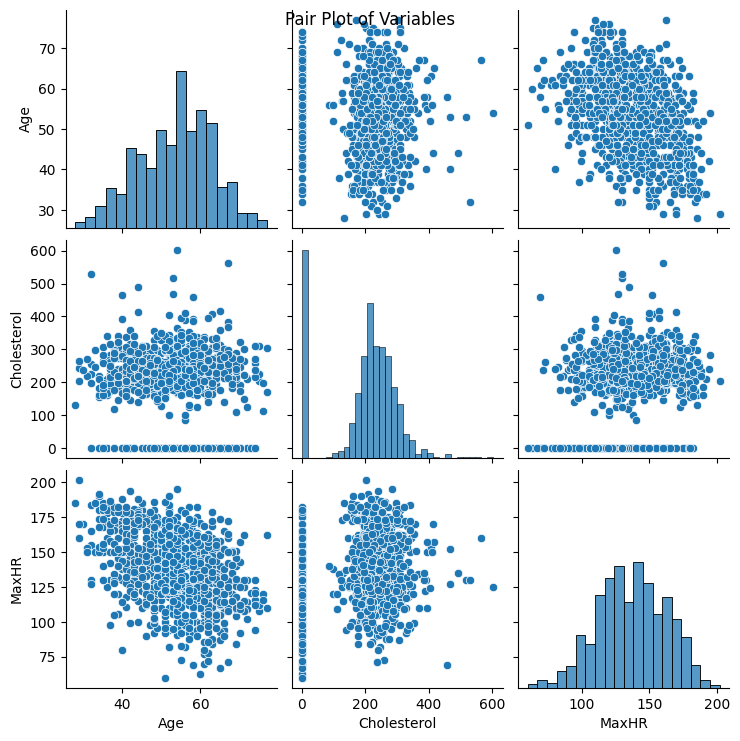

In [17]:
# Create a pair plot using Seaborn
# Just run this cell to see the output
# Try different combinations of features
sns.pairplot(dataset[['Age', 'Cholesterol', 'MaxHR']])

# Add a title
plt.suptitle('Pair Plot of Variables')

# Show the plot
plt.show()

In [21]:
# Check if there is any Nan values
# Hint: use isna() command
dataset.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Part 2: LR with no categorical data

At this step, drop all categorical columns when you define X. The categorical columns are 'ChestPainType', "RestingECG", "ExerciseAngina", "ST_Slope", and "Sex". And for sure, you need to drop the target column which is 'HeartDisease'

In [22]:
# Define X
X = dataset.drop(columns=['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'Sex', 'HeartDisease'])

In [23]:
# define y
y = dataset['HeartDisease']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2509)

In [25]:
# Standardize data

# Initialize the scaler
scaler = StandardScaler()

# Fit on training set only
scaler.fit(X_train)

# Apply transform to both the training set and the test set
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)


In [26]:
# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Define regressor
regressor = LogisticRegression()

# Apply regressor
regressor.fit(X_train_scaled, y_train)

LogisticRegression()

In [27]:
# Import Evaluation Metric
from sklearn.metrics import accuracy_score

# Make predictions using regressor
predictions = regressor.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)

# Print Accuracy
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.7565217391304347


# Part 3: LR with Categorical data

At this step, you need to apply integer/label encoding to all categorical columns when you define X. The categorical columns are 'ChestPainType', "RestingECG", "ExerciseAngina", "ST_Slope", and "Sex". By doing this, you map categorical Data to Numerical values, and so those columns can be used as new features to be used in Logistic Regression.

In [28]:
'''
Determining unique values of categorical column
So, you will know how many labels are required for each column.
The expected output is shown below.

Hint 1: use 'unique()' command for "ChestPainType", "RestingECG",
"ExerciseAngina", "ST_Slope", and "Sex" columns.

Hint 2: print the output of 'unique()' command
'''

# Determining unique values of categorical columns
print("ChestPainType:", dataset["ChestPainType"].unique())  
print("RestingECG:", dataset["RestingECG"].unique())  
print("ExerciseAngina:", dataset["ExerciseAngina"].unique())  
print("ST_Slope:", dataset["ST_Slope"].unique())  
print("Sex:", dataset["Sex"].unique())  

ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
RestingECG: ['Normal' 'ST' 'LVH']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']
Sex: ['M' 'F']


In [30]:
'''
Apply integer/label encodig to "ChestPainType", "RestingECG",
"ExerciseAngina", "ST_Slope", and "Sex" columns.

As an example, integer/label encodig is applied to "ChestPainType" column below

Follow this example and apply integer/label encodig to "RestingECG",
"ExerciseAngina", "ST_Slope", and "Sex" columns
'''
dataset["ChestPainType"] = dataset["ChestPainType"].replace({"ATA": 0, "NAP": 1, "ASY": 2, "TA": 3}).astype(int)

dataset["RestingECG"] = dataset["RestingECG"].replace({"Normal": 0, "ST": 1, "LVH": 2}).astype(int)
dataset["ExerciseAngina"] = dataset["ExerciseAngina"].replace({"N": 0, "Y": 1}).astype(int)
dataset["ST_Slope"] = dataset["ST_Slope"].replace({"Up": 0, "Flat": 1, "Down": 2}).astype(int)
dataset["Sex"] = dataset["Sex"].replace({"M": 0, "F": 1}).astype(int)



In [31]:
# Check the revised dataset
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


# Defining X including categorical data

At this step, define X again. In this time, include all revised categorical columns that are 'ChestPainType', "RestingECG", "ExerciseAngina", "ST_Slope", and "Sex". Hint: You need to drop only the target column which is 'HeartDisease'

In [32]:
# Define X
X = dataset.drop(columns=['HeartDisease'])

In [33]:
# Define y
y = dataset['HeartDisease']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2509)

In [35]:
# Standardize data

# Initialize the scaler
scaler = StandardScaler()

# Fit on training set only
scaler.fit(X_train)

# Apply transform to both the training set and the test set
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)


In [36]:
# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Define regressor
regressor = LogisticRegression()

# Apply regressor
regressor.fit(X_train_scaled, y_train)

LogisticRegression()

In [37]:
# Import Evaluation Metric
from sklearn.metrics import accuracy_score

# Make predictions using regressor
predictions = regressor.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)

# Print Accuracy
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.8521739130434782
